# Training eines CNNs zur Klassifikation von Bildern

In dieser Aufgabe soll ein CNN zur Klassifikation von Bildern des CFIAR10-Datensets trainiert werden.

Mit den folgenden Anweisungen könne Sie die CFIAR10-Daten herunterladen und in Trainings- und Test-Daten aufspalten:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def show_labeled_sample_images(size=12):
    plt.figure(figsize=(size, size))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()


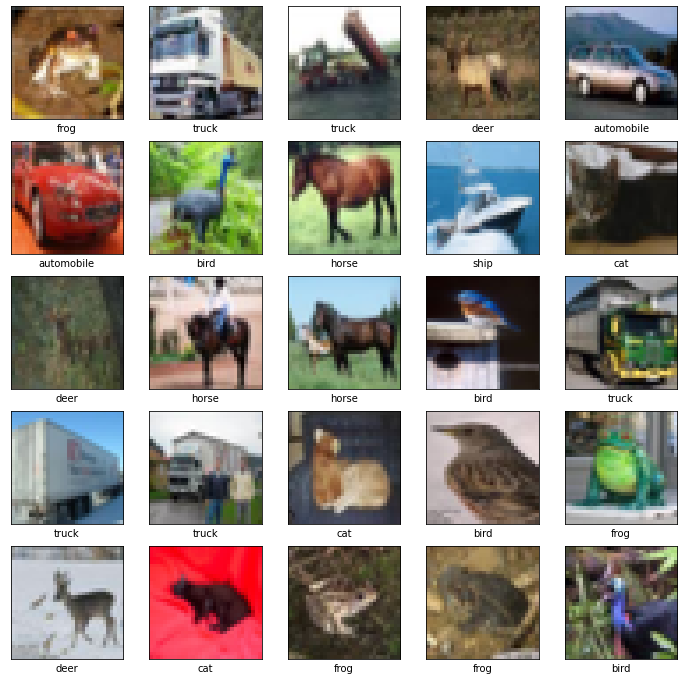

In [5]:
show_labeled_sample_images()

Definieren Sie ein CNN, mit dem Bilder aus diesem Datensatz klassifiziert werden können.

Eine geeignete Architektur ist die folgende:

- Conv2D: 32 Kernels der Größe 3x3, Relu Aktivierungsfunktion
- MaxPooling2D
- Conv2D: 64 Kernels der Größe 3x3, Relu Aktivierungsfunktion
- MaxPooling2D
- Conv2D: 64 Kernels der Größe 3x3, Relu Aktivierungsfunktion
- Dense Layer mit 64 Neuronen, Relu Aktivierungsfunktion

(Sie benötigen möglicherweise zusätzliche Layer zur Ein- und Ausgabe sowie zur Anpassung der internen Layer. Außerdem ist es vorteilhaft, das Output Layer ohne Aktivierungsfunktion zu definieren.)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential([
    Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, 3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

Zeigen Sie eine Zusammenfassung Ihres Modells an.

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

Kompiliren Sie Ihr Modell. Verwenden Sie einen Adam-Optimizer, `tf.keras.losses.SparseCategoricalCrossentropy` als Loss-Funktion und Accuracy als Metrik. (Wenn Sie keine Softmax Aktivierung für Ihr letztes Layer gewählt haben müssen Sie bei der Loss-Funktion den Parameter `from_logits` auf `True` setzen.)

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Trainieren Sie Ihr Modell 10 Epochen lang.

In [29]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 35s 23ms/step - loss: 2.7712 - accuracy: 0.3449 - val_loss: 1.4464 - val_accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3702 - accuracy: 0.5081 - val_loss: 1.3398 - val_accuracy: 0.5164
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2211 - accuracy: 0.5679 - val_loss: 1.2305 - val_accuracy: 0.5640
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1174 - accuracy: 0.6097 - val_loss: 1.1356 - val_accuracy: 0.6021
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0376 - accuracy: 0.6374 - val_loss: 1.1436 - val_accuracy: 0.6062
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9750 - accuracy: 0.6592 - val_loss: 1.0198 - val_accuracy: 0.6491
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9135 - accuracy: 0.6835 - val_loss: 1.1270 -

Zeichnen Sie ein Diagramm mit der Accuracy Ihres Modells für jede Trainingsepoche.

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Berechnen Sie den Test-Loss und die Test-Accuracy Ihres Modells.

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_loss, test_acc

313/313 - 2s - loss: 11.0571 - accuracy: 0.1000


(11.057145118713379, 0.10000000149011612)